In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates

plt.style.use('ggplot')

In [2]:
# import csv and convert 'Date' column to datetime, and set as index
df = pd.read_csv('prices.csv', parse_dates=['Date'], index_col=['Date'])

In [3]:
# filter to price & quantity of similar items.
price = df.filter(items=['Date', 'Regulus Price', 'Bast Price', 'Wood Price', 'Resin Price', 'Rune Price', 'Wax Price'])
quantity = df.filter(items=['Date', 'Regulus Quantity Listed', 'Bast Quantity Listed', 'Wood Quantity Listed', 'Resin Quantity Listed', 'Rune Quantity Listed', 'Wax Quantity Listed'])

# simplify column names
cols = ['Regulus', 'Bast', 'Wood', 'Resin', 'Rune', 'Wax']
price.columns = cols
quantity.columns = cols

# separate tracked periods of time
price_2020 = price.loc['2020':'2021']
price_2022 = price.loc['2022':]

# remove missing values
price = price.dropna()
quantity = quantity.dropna()

In [4]:
# dictionaries for plot colors, fonts etc
focus = {'lw':1.2, 'color':'#ff6d00', 'alpha':0.95}
focus2 = {'lw':1.8, 'color':'#58BABB', 'alpha':0.55}
neutral = {'lw':0.5, 'color':'slategray', 'alpha':0.5}

event = {'ec':None, 'color':'w', 'alpha':0.5}
expl = {'ec':None, 'color':'honeydew', 'alpha':0.4}
update = {'lw':1, 'linestyle':'dotted', 'c':'slategray', 'alpha':0.8}

ffont = {'fontsize':6, 'color':'#ff6d00'}
ffont2 = {'fontsize':6, 'color':'#58BABB'}
xfont = {'fontsize':5, 'color':'silver'}
ftitle = {'fontsize':7, 'color':'slategray'}
fevent = {'fontsize':4.2, 'color':'slategray', 'rotation':'vertical', 'style':'italic'}

fgrid = {'grid_color':'#FFF2E8', 'grid_alpha':0.5, 'labelsize':3.5, 'size':0}
fgrid2 = {'grid_color':'#EDFFFF', 'grid_alpha':0.5, 'labelsize':3.5, 'size':0}
xticks = {'color':'w', 'direction':'in', 'labelsize':3.5, 'size':2}

# find date of last entry and add 2 days for graph xlim
lastdate = price.index[-1]
lastdate = lastdate + timedelta(days=2)

# find length of current tracked period for graph width ratios
lastplot = ((price.index[-1] - price.index[44]).days) + 2

In [5]:
# find min and max prices with dates for 2020 & 2022
price_idxmin20 = price_2020.idxmin()
price_min20 = price_2020.min()
price_idxmin22 = price_2022.idxmin()
price_min22 = price_2022.min()
price_idxmax20 = price_2020.idxmax()
price_max20 = price_2020.max()
price_idxmax22 = price_2022.idxmax()
price_max22 = price_2022.max()

# combine into dataframe
price_info = pd.concat([price_idxmin20, price_min20, price_idxmax20, price_max20, price_idxmin22, price_min22, price_idxmax22, price_max22], axis=1)

cols = ['Date of Minimum (2020)', 'Mininimum (2020)', 'Date of Maximum (2020)', 'Maximum (2020)', 'Date of Minimum 2022', 'Minimum (2022)', 'Date of Maximum (2020)', 'Maximum (2020)']
price_info.columns = cols # label columns

display(price_info)

,Date of Minimum (2020),Mininimum (2020),Date of Maximum (2020),Maximum (2020),Date of Minimum 2022,Minimum (2022),Date of Maximum (2020),Maximum (2020)
Regulus,2020-10-07,23,2020-12-29,85,2022-04-23,57,2022-07-20,76
Bast,2020-09-26,22,2020-12-26,107,2022-04-16,38,2022-03-19,47
Wood,2020-09-21,351,2020-12-22,1115,2022-04-16,1189,2022-07-20,1382
Resin,2020-09-21,9,2020-10-20,12,2022-03-26,17,2022-06-01,21
Rune,2020-09-21,517,2021-01-28,706,2022-04-16,1182,2022-06-08,1535
Wax,2020-09-21,344,2020-10-20,512,2022-04-20,710,2022-06-08,791


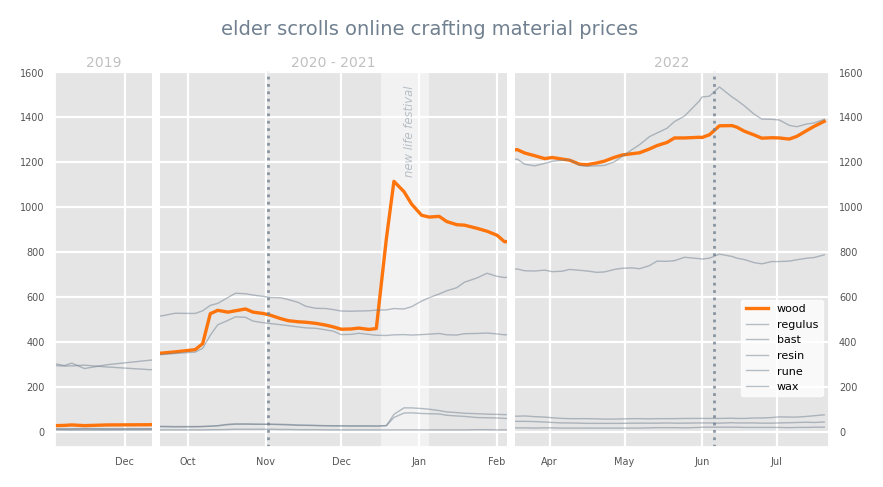

In [6]:
# create a row of 3 subplots to hide gaps in price data, highlight wood
fig, axes = plt.subplots(1, 3, sharey=True, gridspec_kw={'width_ratios':[39, 138, lastplot]})
fig.set_size_inches(5,2.5)
fig.set_dpi(200)
fig.suptitle('elder scrolls online crafting material prices', **ftitle)

for ax in axes:
    ax.plot(price['Wood'], label='wood', **focus)
    ax.plot(price['Regulus'], label='regulus', **neutral)
    ax.plot(price['Bast'], label='bast', **neutral)
    ax.plot(price['Resin'], label='resin', **neutral)
    ax.plot(price['Rune'], label='rune', **neutral)
    ax.plot(price['Wax'], label='wax', **neutral)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # adjust date ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b")) # adjust tick labels
    ax.tick_params(labelsize=3.5, size=0) # tick label size & hide ticks
    
axes[0].set_title('2019', pad=-2, **xfont)
axes[1].set_title('2020 - 2021', pad=-2, **xfont)
axes[2].set_title('2022', pad=-2, **xfont)
axes[2].legend(facecolor='w', edgecolor='w', loc=(0.72,0.135), fontsize=4)

# set x-axis limits for each plot
axes[0].set_xlim(datetime(2019,11,3,0,0,0), datetime(2019,12,12,0,0,0))
axes[1].set_xlim(datetime(2020,9,20,0,0,0), datetime(2021,2,5,0,0,0))
axes[2].set_xlim(datetime(2022,3,18,0,0,0), lastdate)

# mark important dates
axes[1].axvline(x=['2020-11-02'], **update) # update 28: markarth

xy = datetime(2020,12,17,0,0,0), axes[1].get_ylim()[0] # new life 2020
w, h = timedelta(days=19), axes[1].get_ylim()[1] - axes[1].get_ylim()[0]
axes[1].add_patch(Rectangle(xy, w, h, **event))
axes[1].text(x=['2020-12-26'], y=1150, s='new life festival', **fevent, alpha=0.45)

axes[2].axvline(x=['2022-06-06'], **update) # update 34: high isle

# hide inner spines
axes[0].spines['right'].set_visible(False)
axes[1].spines[['left', 'right']].set_visible(False)
axes[2].spines['left'].set_visible(False)

# show y-axis labels on right of third plot
axes[2].tick_params(labelright=True)

fig.subplots_adjust(wspace=0.03) # squish plots closer together

plt.show()

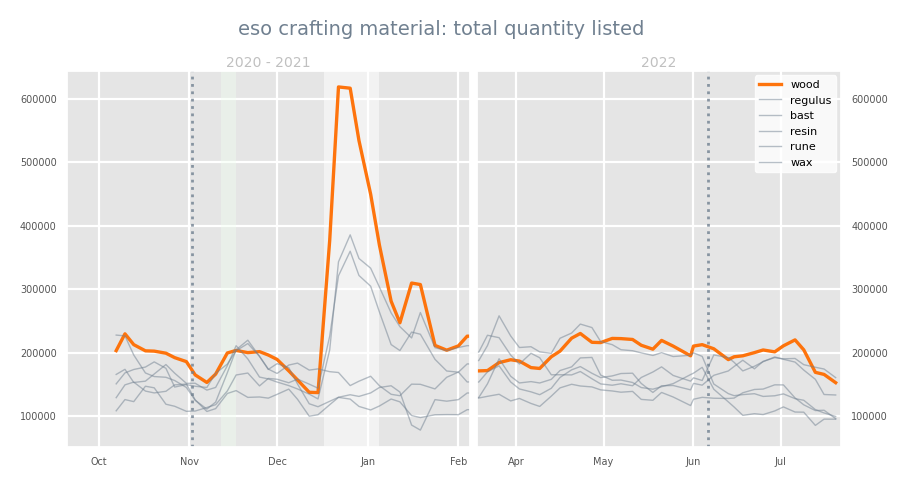

In [7]:
# create row with 2 subplots for quantity with gaps in time hidden, highlight wood
fig, axes = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios':[138, lastplot]})
fig.set_size_inches(5,2.5)
fig.set_dpi(200)
fig.suptitle('eso crafting material: total quantity listed', **ftitle)

for ax in axes:
    ax.plot(quantity['Wood'], label='wood', **focus)
    ax.plot(quantity['Regulus'], label='regulus', **neutral)
    ax.plot(quantity['Bast'], label='bast', **neutral)
    ax.plot(quantity['Resin'], label='resin', **neutral)
    ax.plot(quantity['Rune'],label='rune', **neutral)
    ax.plot(quantity['Wax'], label='wax', **neutral)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

axes[0].set_title('2020 - 2021', pad=-2, **xfont)
axes[1].set_title('2022', pad=-2, **xfont)
axes[1].legend(facecolor='w', edgecolor='w', loc='upper right', fontsize=4)

# set x limits for each plot
axes[0].set_xlim(datetime(2020,9,20,0,0,0), datetime(2021,2,5,0,0,0))
axes[1].set_xlim(datetime(2022,3,18,0,0,0), lastdate)

# mark important dates with rectangles/lines
axes[0].axvline(x=['2020-11-02'], **update) # update 28

xy = datetime(2020,11,12,0,0,0), axes[0].get_ylim()[0] # explorer's celebration 2020
w, h = timedelta(days=5), axes[0].get_ylim()[1] - axes[0].get_ylim()[0]
axes[0].add_patch(Rectangle(xy, w, h, **expl))

xy = datetime(2020,12,17,0,0,0), axes[0].get_ylim()[0] # new life 2020
w, h = timedelta(days=19), axes[0].get_ylim()[1] - axes[0].get_ylim()[0]
axes[0].add_patch(Rectangle(xy, w, h, **event))

axes[1].axvline(x=['2022-06-06'], **update) # update 34

# remove inner axis ticks/labels
axes[0].tick_params(labelleft=True, labelsize=3.5, size=0)
axes[1].tick_params(labelright=True, labelsize=3.5, size=0)

# squish plots closer together
fig.subplots_adjust(wspace=0.015)

plt.show()

In [8]:
# amount of price change between entries
price_diff = price.diff()

price_diff = price_diff.dropna() # remove rows with nothing to compare to
price_diff = price_diff.drop(labels=['2020-09-21', '2022-03-19']) # remove first rows after large gaps

# descriptive statistics for price changes
price_diff_desc = price_diff.describe()
price_diff_desc = price_diff_desc.round(decimals = 0)

display(price_diff_desc)

,Regulus,Bast,Wood,Resin,Rune,Wax
count,77.0,77.0,77.0,77.0,77.0,77.0
mean,1.0,1.0,8.0,0.0,5.0,2.0
std,5.0,7.0,58.0,1.0,18.0,11.0
min,-6.0,-6.0,-55.0,-1.0,-44.0,-17.0
25%,-1.0,-1.0,-9.0,0.0,-6.0,-5.0
50%,0.0,0.0,-1.0,0.0,3.0,0.0
75%,1.0,0.0,8.0,0.0,17.0,5.0
max,36.0,50.0,400.0,2.0,68.0,58.0


In [9]:
quant_diff = quantity.diff()

quant_diff = quant_diff.dropna()
quant_diff = quant_diff.drop(labels=['2022-03-19'])

quant_diff_desc = quant_diff.describe()
quant_diff_desc = quant_diff_desc.round(decimals = 0)

display(quant_diff_desc)

,Regulus,Bast,Wood,Resin,Rune,Wax
count,69.0,69.0,69.0,69.0,69.0,69.0
mean,-620.0,576.0,62.0,-936.0,-1222.0,-745.0
std,27107.0,23304.0,49609.0,13498.0,16409.0,10208.0
min,-55421.0,-51252.0,-95851.0,-29560.0,-52003.0,-26668.0
25%,-13631.0,-8125.0,-11915.0,-10133.0,-9905.0,-5574.0
50%,-4297.0,-258.0,-2149.0,-1895.0,-1257.0,311.0
75%,3880.0,6363.0,6543.0,7496.0,8596.0,5169.0
max,138723.0,94992.0,241651.0,40265.0,48031.0,23851.0


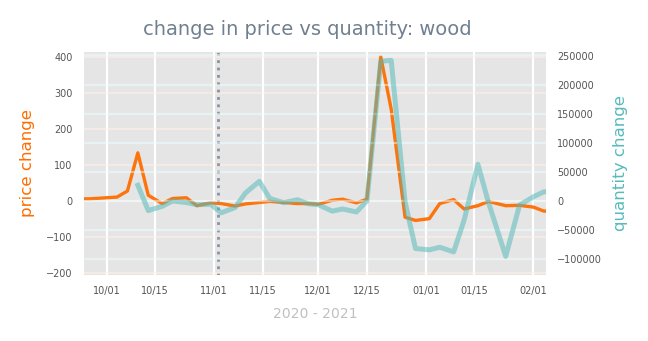

In [10]:
# Line graph showing relationship between changes in wood price and quantity listed for sale

fig, ax1 = plt.subplots()
fig.suptitle('change in price vs quantity: wood', **ftitle)
fig.set_size_inches(3, 1.5)
fig.set_dpi(200)

ax1.plot(price_diff['Wood'], **focus)
ax1.set_ylabel('price change', **ffont)
ax1.set_xlabel('2020 - 2021', **xfont)
ax1.tick_params(axis='y', **fgrid)
ax1.tick_params(axis='x', **xticks)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax1.set_xlim(datetime(2020,9,24,0,0,0), datetime(2021,2,5,0,0,0))
ax1.set_ylim(-210, 420)

ax2 = ax1.twinx()
ax2.plot(quant_diff['Wood'], **focus2)
ax2.set_ylabel('quantity change', **ffont2)
ax2.tick_params(axis='y', **fgrid2)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax2.set_ylim(-130000, 260000)

# update 28
ax1.axvline(x=['2020-11-02'], **update)

plt.show()

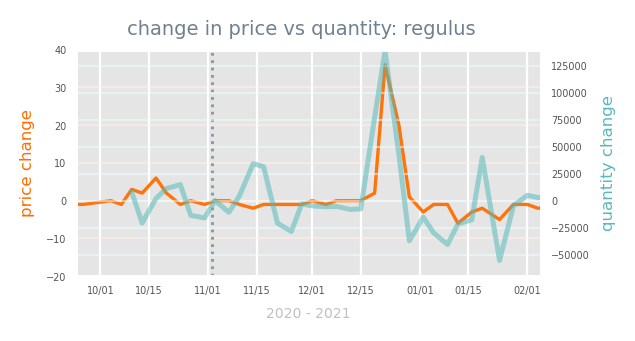

In [11]:
# Line graph showing relationship between changes in regulus price and quantity listed for sale

fig, ax1 = plt.subplots()
fig.suptitle('change in price vs quantity: regulus', **ftitle)
fig.set_size_inches(3, 1.5)
fig.set_dpi(200)

ax1.plot(price_diff['Regulus'], **focus)
ax1.set_ylabel('price change', **ffont)
ax1.set_xlabel('2020 - 2021', **xfont)
ax1.tick_params(axis='y', **fgrid)
ax1.tick_params(axis='x', **xticks)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax1.set_xlim(datetime(2020,9,24,0,0,0), datetime(2021,2,5,0,0,0))
ax1.set_ylim(-20, 40)

ax2 = ax1.twinx()
ax2.plot(quant_diff['Regulus'], **focus2)
ax2.set_ylabel('quantity change', **ffont2)
ax2.tick_params(axis='y', **fgrid2)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax2.set_ylim(-70000, 140000)

# update 28
ax1.axvline(x=['2020-11-02'], **update)

plt.show()

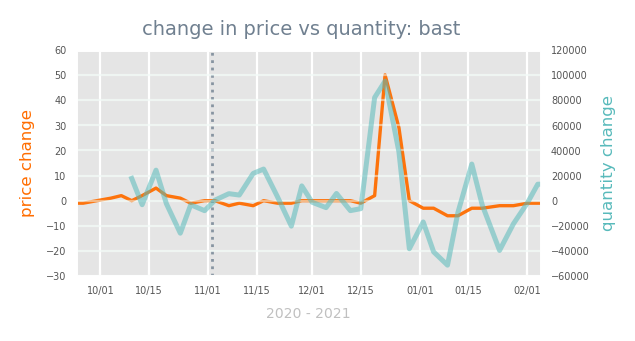

In [12]:
# Line graph showing relationship between changes in bast price and quantity listed for sale

fig, ax1 = plt.subplots()
fig.suptitle('change in price vs quantity: bast', **ftitle)
fig.set_size_inches(3, 1.5)
fig.set_dpi(200)

ax1.plot(price_diff['Bast'], **focus)
ax1.set_ylabel('price change', **ffont)
ax1.set_xlabel('2020 - 2021', **xfont)
ax1.tick_params(axis='y', **fgrid)
ax1.tick_params(axis='x', **xticks)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax1.set_xlim(datetime(2020,9,24,0,0,0), datetime(2021,2,5,0,0,0))
ax1.set_ylim(-30, 60)

ax2 = ax1.twinx()
ax2.plot(quant_diff['Bast'], **focus2)
ax2.set_ylabel('quantity change', **ffont2)
ax2.tick_params(axis='y', **fgrid2)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax2.set_ylim(-60000, 120000)

# update 28
ax1.axvline(x=['2020-11-02'], **update)

plt.show()

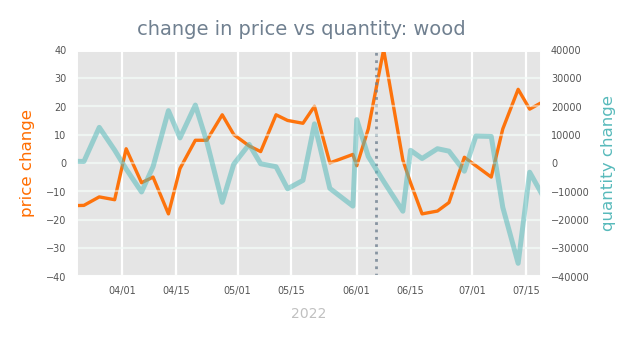

In [13]:
# Line graph showing relationship between changes in wood price and quantity listed for sale

fig, ax1 = plt.subplots()
fig.suptitle('change in price vs quantity: wood', **ftitle)
fig.set_size_inches(3, 1.5)
fig.set_dpi(200)

ax1.plot(price_diff['Wood'], **focus)
ax1.set_ylabel('price change', **ffont)
ax1.set_xlabel('2022', **xfont)
ax1.tick_params(axis='y', **fgrid)
ax1.tick_params(axis='x', **xticks)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax1.set_xlim(datetime(2022,3,20,0,0,0), datetime(2022,7,19,0,0,0))
ax1.set_ylim(-40, 40)

ax2 = ax1.twinx()
ax2.plot(quant_diff['Wood'], **focus2)
ax2.set_ylabel('quantity change', **ffont2)
ax2.tick_params(axis='y', **fgrid2)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax2.set_ylim(-40000, 40000)

# update 34
ax1.axvline(x=['2022-06-06'], **update)

plt.show()

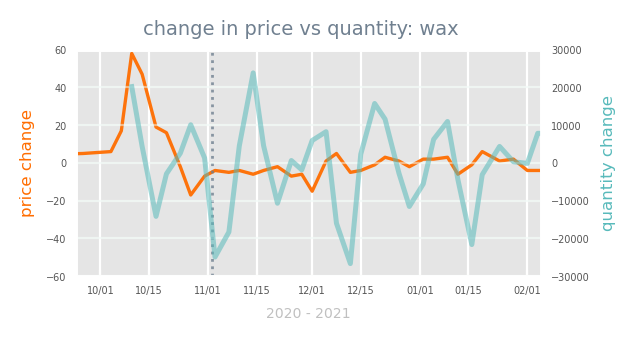

In [14]:
# Line graph showing relationship between changes in wax price and quantity listed for sale

fig, ax1 = plt.subplots()
fig.suptitle('change in price vs quantity: wax', **ftitle)
fig.set_size_inches(3, 1.5)
fig.set_dpi(200)

ax1.plot(price_diff['Wax'], **focus)
ax1.set_ylabel('price change', **ffont)
ax1.set_xlabel('2020 - 2021', **xfont)
ax1.tick_params(axis='y', **fgrid)
ax1.tick_params(axis='x', **xticks)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax1.set_xlim(datetime(2020,9,24,0,0,0), datetime(2021,2,5,0,0,0))
ax1.set_ylim(-60, 60)

ax2 = ax1.twinx()
ax2.plot(quant_diff['Wax'], **focus2)
ax2.set_ylabel('quantity change', **ffont2)
ax2.tick_params(axis='y', **fgrid2)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax2.set_ylim(-30000, 30000)

# update 28
ax1.axvline(x=['2020-11-02'], **update)

plt.show()

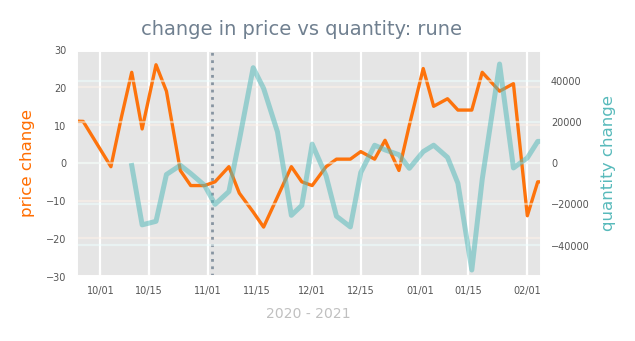

In [15]:
# Line graph showing relationship between changes in rune price and quantity listed for sale

fig, ax1 = plt.subplots()
fig.suptitle('change in price vs quantity: rune', **ftitle)
fig.set_size_inches(3, 1.5)
fig.set_dpi(200)

ax1.plot(price_diff['Rune'], **focus)
ax1.set_ylabel('price change', **ffont)
ax1.set_xlabel('2020 - 2021', **xfont)
ax1.tick_params(axis='y', **fgrid)
ax1.tick_params(axis='x', **xticks)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax1.set_xlim(datetime(2020,9,24,0,0,0), datetime(2021,2,5,0,0,0))
ax1.set_ylim(-30, 30)

ax2 = ax1.twinx()
ax2.plot(quant_diff['Rune'], **focus2)
ax2.set_ylabel('quantity change', **ffont2)
ax2.tick_params(axis='y', **fgrid2)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax2.set_ylim(-55000, 55000)

# update 28
ax1.axvline(x=['2020-11-02'], **update)

plt.show()

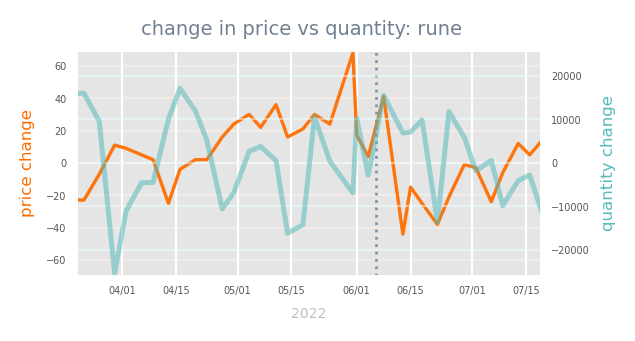

In [16]:
# Line graph showing relationship between changes in rune price and quantity listed for sale

fig, ax1 = plt.subplots()
fig.suptitle('change in price vs quantity: rune', **ftitle)
fig.set_size_inches(3, 1.5)
fig.set_dpi(200)

ax1.plot(price_diff['Rune'], **focus)
ax1.set_ylabel('price change', **ffont)
ax1.set_xlabel('2022', **xfont)
ax1.tick_params(axis='y', **fgrid)
ax1.tick_params(axis='x', **xticks)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax1.set_xlim(datetime(2022,3,20,0,0,0), datetime(2022,7,19,0,0,0))
ax1.set_ylim(-70, 70)

ax2 = ax1.twinx()
ax2.plot(quant_diff['Rune'], **focus2)
ax2.set_ylabel('quantity change', **ffont2)
ax2.tick_params(axis='y', **fgrid2)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax2.set_ylim(-26000, 26000)

# update 34
ax1.axvline(x=['2022-06-06'], **update)

plt.show()